In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['image.cmap'] = 'inferno'

## Predicciones Basadas en un Auto Regresor

In [166]:
prices = pd.read_csv('./dataset/prices_nyse.csv', index_col=0, parse_dates=True)
prices = prices[['AAPL']]

def percent_change(series):
    previous_values = series[:-1]
    last_value = series[-1]
    
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

def replace_outliers(series):
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    series[this_mask] = np.nanmedian(series)
    return series

prices_perc = prices.rolling(20).apply(percent_change)
prices_perc = prices_perc.apply(replace_outliers)

In [167]:
shifts = np.arange(1, 11).astype(int)
shifted_data = {"lag_{}_day".format(day_shift): prices_perc['AAPL'].shift(day_shift) for day_shift in shifts}
prices_perc_shifted = pd.DataFrame(shifted_data)

In [168]:
#X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
#y = prices_perc['AAPL'].fillna(np.nanmedian(prices_perc['AAPL']))

X = features.fillna(np.nanmedian(features)).join(prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted)))
y = prices_perc['AAPL'].fillna(np.nanmedian(prices_perc['AAPL']))

n = 500

X_train = X[:-n]
y_train = y[:-n]

X_test = X[-n:]
y_test = y[-n:]

In [6]:
from sklearn.linear_model import Ridge

In [7]:
model = Ridge()
model.fit(X_train, y_train)

Ridge()

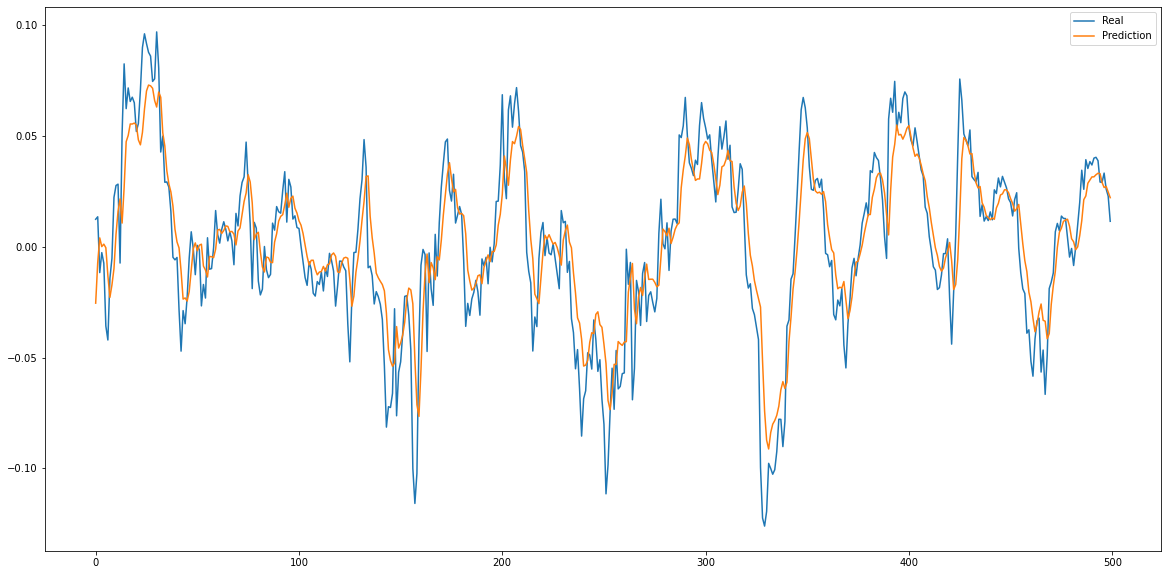

In [8]:
fig, ax = plt.subplots()
ax.plot(y_test.values, label='Real')
ax.plot(model.predict(X_test), label='Prediction')
ax.legend()

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

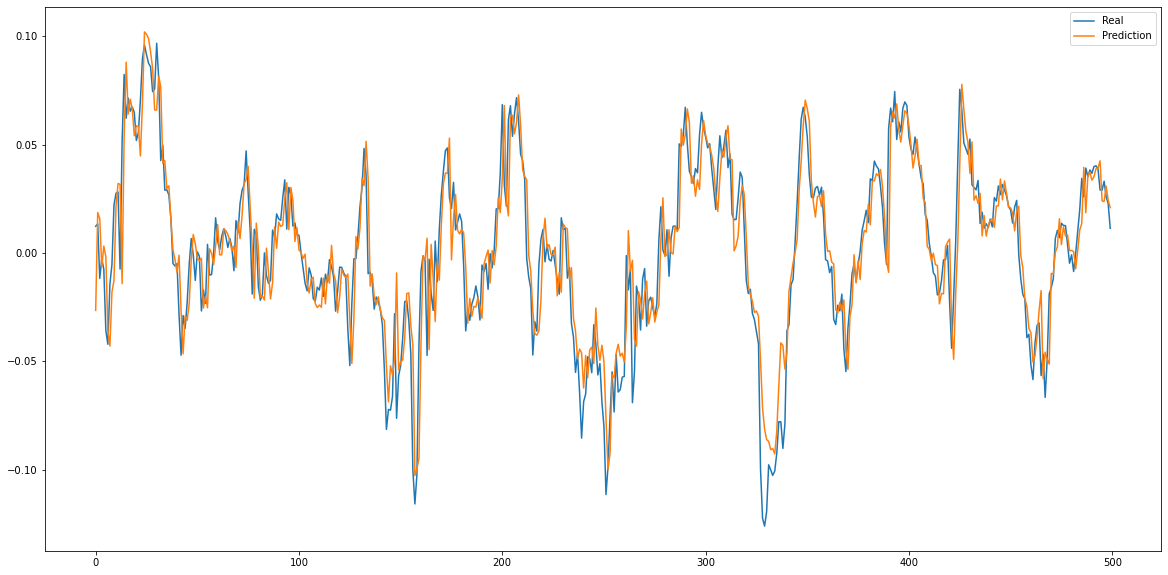

In [11]:
fig, ax = plt.subplots()
ax.plot(y_test.values, label='Real')
ax.plot(model.predict(X_test), label='Prediction')
ax.legend()

In [12]:
from sklearn.neural_network import MLPRegressor

In [13]:
model = MLPRegressor()
model.fit(X_train, y_train)

MLPRegressor()

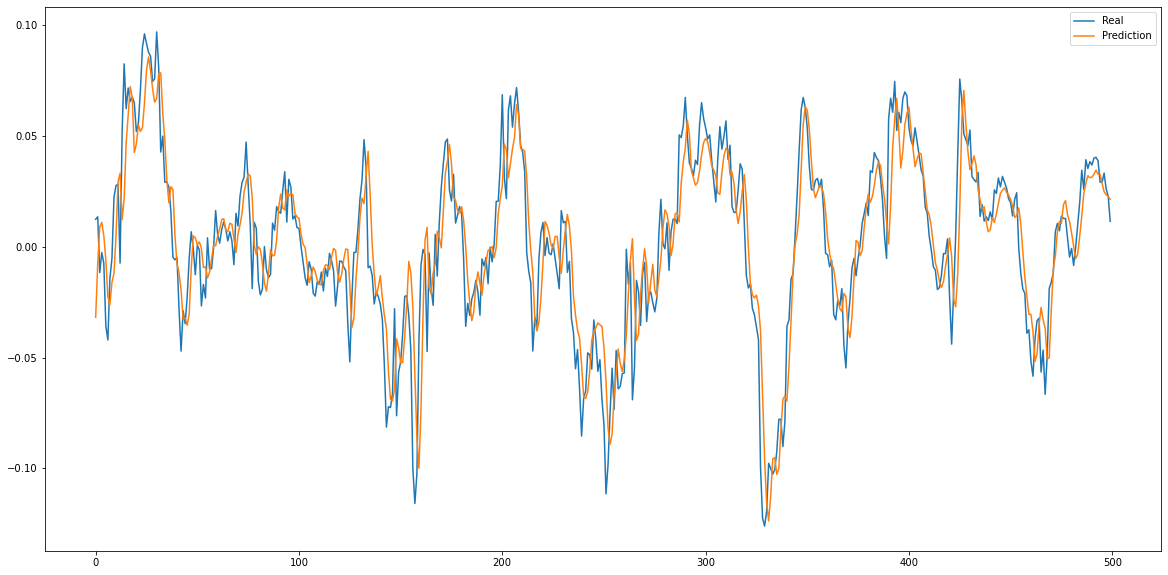

In [14]:
fig, ax = plt.subplots()
ax.plot(y_test.values, label='Real')
ax.plot(model.predict(X_test), label='Prediction')
ax.legend()

## Predicciones Basadas en Combinación de otras Acciones

In [199]:
from sklearn.linear_model import LinearRegression

In [158]:
prices = pd.read_csv('./dataset/tsa_prices.csv', index_col='date', parse_dates=True)
prices.head()

,EBAY,YHOO
date,,
2010-01-04,23.900000,17.100000
2010-01-05,23.650000,17.230000
2010-01-06,23.500000,17.170000
2010-01-07,23.229998,16.700001
2010-01-08,23.509999,16.700001


In [187]:
all_prices = pd.read_csv('./dataset/all_prices.csv', index_col=0, parse_dates=True)
all_prices.columns

Index(['AAPL', 'ABT', 'AIG', 'AMAT', 'ARNC', 'BAC', 'BSX', 'C', 'CHK', 'CMCSA',
       'CSCO', 'DAL', 'EBAY', 'F', 'FB', 'FCX', 'FITB', 'FOXA', 'FTR', 'GE',
       'GILD', 'GLW', 'GM', 'HAL', 'HBAN', 'HPE', 'HPQ', 'INTC', 'JPM', 'KEY',
       'KMI', 'KO', 'MRK', 'MRO', 'MSFT', 'MU', 'NFLX', 'NVDA', 'ORCL', 'PFE',
       'QCOM', 'RF', 'SBUX', 'T', 'V', 'VZ', 'WFC', 'XOM', 'XRX', 'YHOO'],
      dtype='object')

In [206]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['CSCO']]

scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[ -1.44599676  -0.37343863 -31.90603812]


In [237]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,shuffle=False, random_state=1)

model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

<ipython-input-237-00e4d1f1b1d8>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


-1.563078469488361


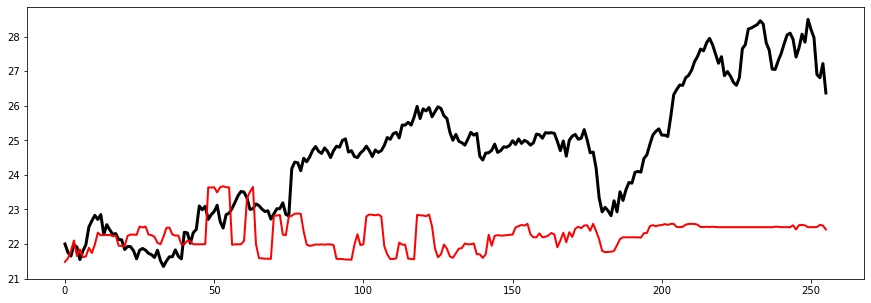

In [238]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(len(y_test)), y_test, color='k', lw=3);
ax.plot(range(len(predictions)), predictions, color='r', lw=2);

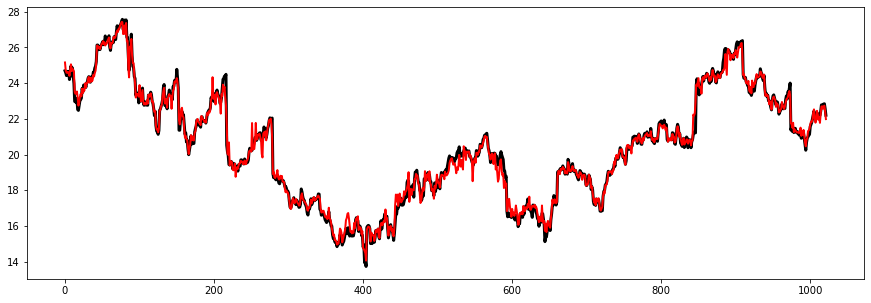

In [239]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(len(y_train)), y_train, color='k', lw=3);
ax.plot(range(len(y_train)), model.predict(X_train), color='r', lw=2);

In [240]:
import seaborn as sns

<AxesSubplot:>

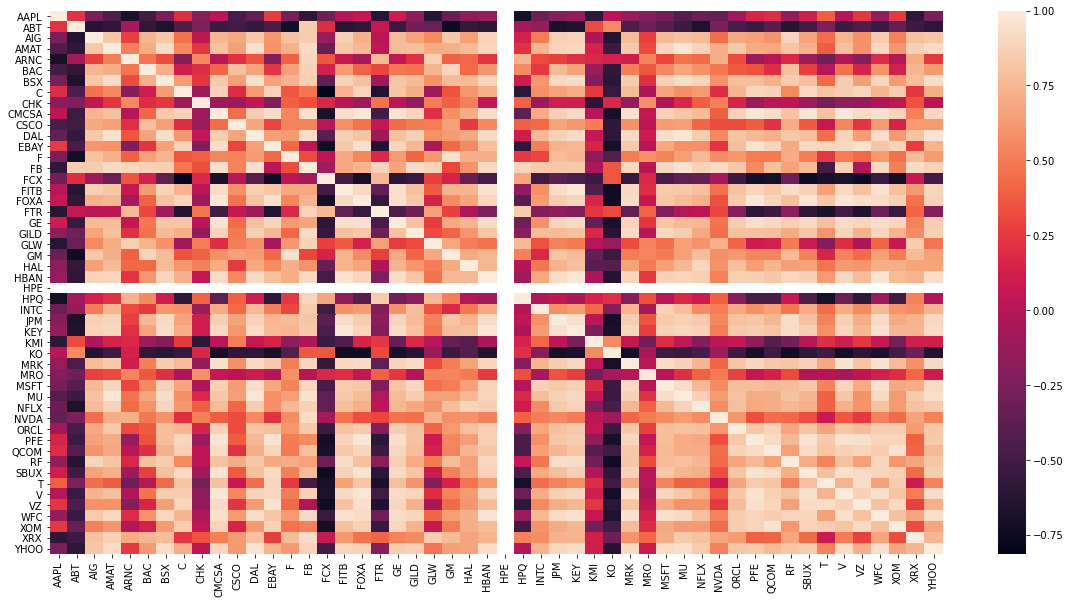

In [248]:
sns.heatmap(all_prices.corr())

In [293]:
d_c = all_prices.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().to_frame().loc[['ABT']]
d_c.head(10)

0
ABT FB    0.848972
    GM    0.744608
    F     0.721086
    JPM   0.684302
    BSX   0.672133
    NFLX  0.671593
    YHOO  0.597353
    HBAN  0.595521
    AMAT  0.581816
    HAL   0.563578

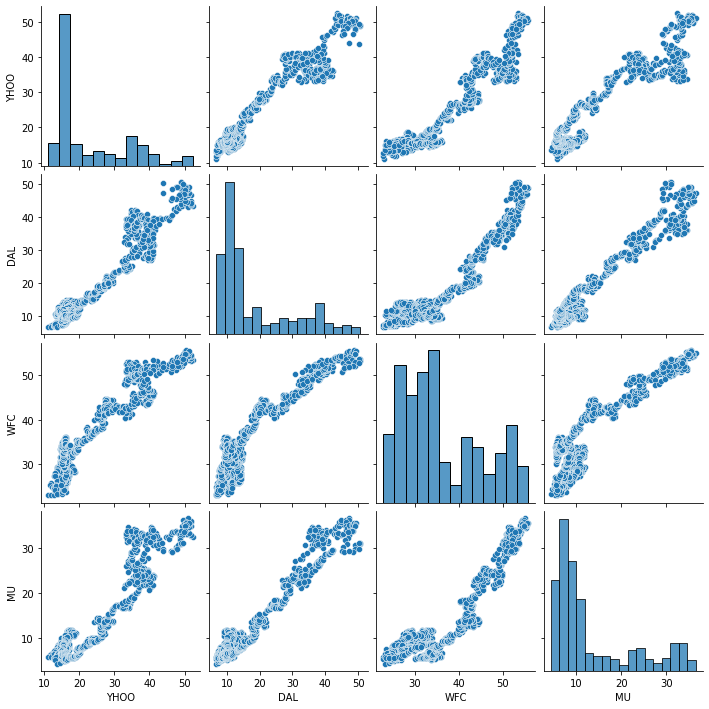

In [265]:
sns.pairplot(all_prices[['YHOO','DAL','WFC','MU']], hue_order=all_prices.index)

In [267]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

X = all_prices[['DAL', 'WFC', 'MU']]
y = all_prices[['YHOO']]

scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-1.94121227  0.56823591  0.46451056]


In [328]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,shuffle=False, random_state=1)

model = MLPRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.1993008182205771


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


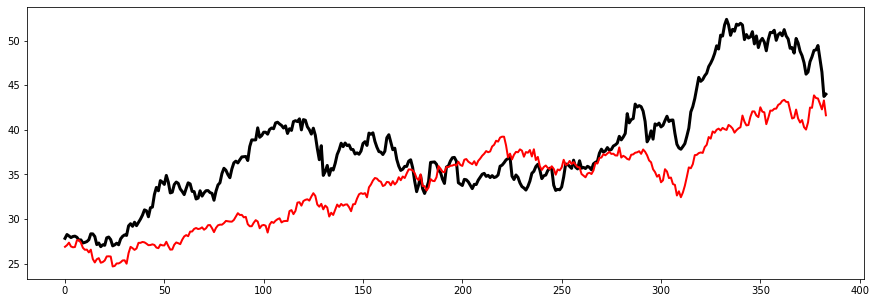

In [329]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(len(y_test)), y_test, color='k', lw=3);
ax.plot(range(len(predictions)), predictions, color='r', lw=2);

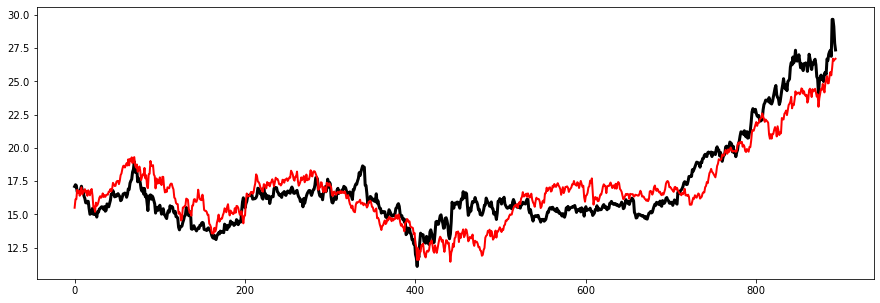

In [330]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(len(y_train)), y_train, color='k', lw=3);
ax.plot(range(len(y_train)), model.predict(X_train), color='r', lw=2);